In [1]:
# This workbook assumes that cells have been detected 
import scipy.io as sio
import numpy as np
from time import time
import ndio.remote.neurodata as neurodata
nd = neurodata()

start = time()
data = np.load('ilastik_out.npy')
data = data.tolist()
token = 'dyer16'


A newer version of ndio is available. 'pip install -U ndio' to update. Pass 'suppress_warnings=True' to the neurodata constructor to suppress this message.


In [3]:
vesselprobs = data['vesselprobs']
cellprobs = data['cellprobs']


sio.savemat('matlab_xbrain.mat',data)

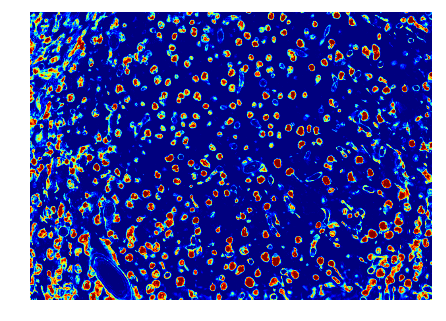

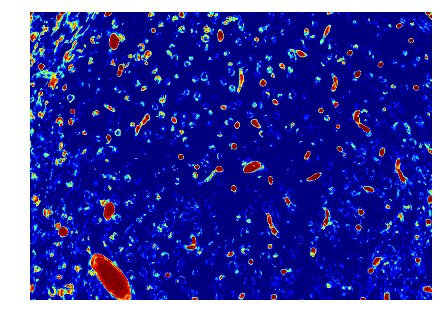

(1012, 728, 300)

In [4]:
# check to make sure that things were read in correctly

%matplotlib inline
import ndparse as ndp

ndp.plot(cellprobs, slice = 50, cmap1='jet')
ndp.plot(vesselprobs, slice = 50, cmap1='jet')

np.shape(cellprobs)

In [5]:
pad = 20 #carried forward from previous analysis
pad2 = 40

if True:
    nd.create_channel(token,'cellprob',neurodata.IMAGE,'float32',0)
    nd.create_channel(token,'vesselprob',neurodata.IMAGE,'float32',0)

    cellprob_crop = cellprobs[pad:np.shape(cellprobs)[0]-pad,pad:np.shape(cellprobs)[1]-pad,pad:np.shape(cellprobs)[2]-pad2]
    vesselprob_crop = vesselprobs[pad:np.shape(vesselprobs)[0]-pad,pad:np.shape(vesselprobs)[1]-pad,pad:np.shape(vesselprobs)[2]-pad2]
    # fairly large - may take a few minutes
    nd.post_cutout(token, 'cellprob', 20, 20, 20, cellprob_crop, resolution = 0)
    
    # fairly large - may take a few minutes
    nd.post_cutout(token, 'vesselprob', 20, 20, 20, vesselprob_crop, resolution = 0)

In [6]:
#import matlab.engine
#eng = matlab.engine.start_matlab()
#tf = eng.isprime(37)
#print tf # matlab is working

In [7]:
# now just need to add the xbrain stuff at the end - feel free to integrate or I will as Monday continues...

# xbrain should be on your matlab path (via toolbox install or otherwise)

#/share0/xbrain/code/celldetect/cellfinder_nd.m
# cellfinder_nd(probFile,presid,startballsz,dilatesz, kmax, paintFile, centroidFile, server, token, channel, doUpload)
print str(time()-start)
vprob = nd.get_cutout(token, 'vesselprob', pad, 600+pad, pad, 600+pad, pad, 260, resolution = 0)
# vessel segmentation
ptr = 0.68
dilatesz = 3
minsize = 4000
#vessels_out = segmentvessels(vesselprob_crop, ptr, dilatesz, minsize)

# z = matlab.single(vprob.tolist()) #TODO - this line is totally ridiculous.  
import scipy.io as sio

prob = {}
prob['data'] = vprob
sio.savemat('vessel_prob_file.mat',prob)
print str(time()-start)

485.625648022
495.852735996


In [8]:
# TODO - fix this connector
# eng.segmentvessels_python('vessel_prob_file', 'vessel_out' ptr, dilatesz, minsize)
# vessels_out = np.asarray(vessels_out)

# data = sio.loadmat('vessel_out')
# ndp.plot(vessels_out, slice = 50)


In [9]:
cprob = nd.get_cutout(token, 'cellprob', 300, 600, 300, 600, 150, 250, resolution = 0)
print str(time()-start)
presid = 0.47
startballsz = 18 
dilatesz = 8
kmax = 500
prob = {}
prob['data'] = cprob
sio.savemat('cell_prob_file.mat',prob)


498.189975023


In [10]:
# TODO - fix this connector
# cell segmentation
#z = matlab.double(cprob.tolist())

#cells_out = eng.cellfinder_nd_python('cell_prob_file','cell_out',presid,startballsz,dilatesz, kmax)
#cells_out = np.asarray(cells_out)


In [11]:
# process in matlab offline and load back

vesselseg = sio.loadmat('vessel_out')
vesselseg = vesselseg['data']

cellseg = sio.loadmat('cell_out')
cellseg = cellseg['data']


In [12]:
if True:
    nd.create_channel(token,'cellseg',neurodata.ANNOTATION,'uint32',0)
    nd.create_channel(token,'vesselseg',neurodata.ANNOTATION,'uint32',0)  

In [14]:
# fairly large - may take a few minutes
nd.post_cutout(token, 'vesselseg', pad, pad, pad, vesselseg, resolution = 0)

# fairly large - may take a few minutes
nd.post_cutout(token, 'cellseg', 300, 300, 150, cellseg, resolution = 0)


True

In [15]:
print str(time()-start)
im = nd.get_cutout(token, 'image', 300, 600, 300, 600, 150, 250, resolution = 0)
cellprob = nd.get_cutout(token, 'cellprob', 300, 600, 300, 600, 150, 250, resolution = 0)
vesselprob = nd.get_cutout(token, 'vesselprob', 300, 600, 300, 600, 150, 250, resolution = 0)
cellseg = nd.get_cutout(token, 'cellseg', 300, 600, 300, 600, 150, 250, resolution = 0)
vesselseg = nd.get_cutout(token, 'vesselseg', 300, 600, 300, 600, 150, 250, resolution = 0)
print str(time()-start)

4176.36291313
4180.74217415


In [2]:
# view result at viz.neurodata.io/dyer16/


True

Raw Image Slice


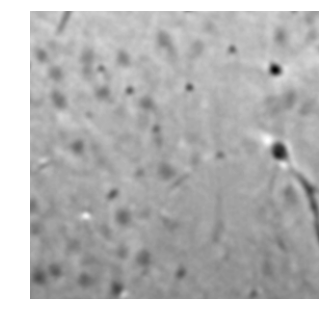

Cell Segmentation


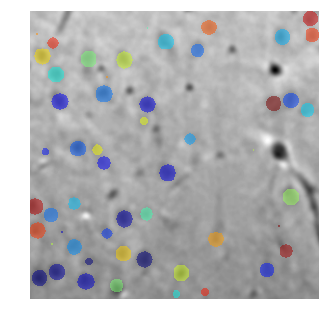

Vessel Segmentation


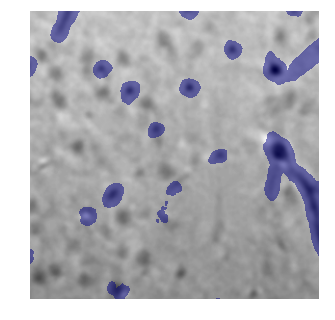

Cell Probabilities


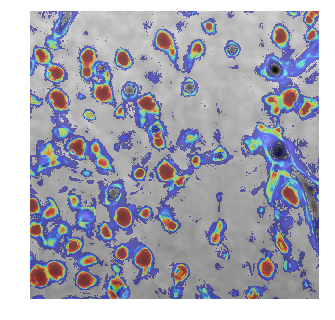

Vessel Probabilities


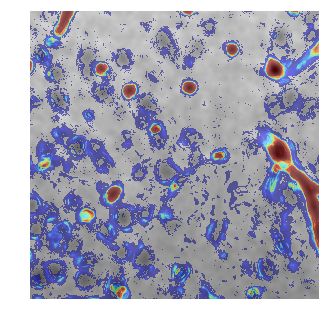

In [17]:
print 'Raw Image Slice'
ndp.plot(im, slice = 50)
print 'Cell Segmentation'
ndp.plot(im, cellseg, slice = 50, alpha = 0.5)
print 'Vessel Segmentation'
ndp.plot(im, vesselseg, slice = 50, alpha = 0.5)
print 'Cell Probabilities'
ndp.plot(im, cellprob, slice = 50, alpha = 0.5)
print 'Vessel Probabilities'
ndp.plot(im, vesselprob, slice = 50, alpha = 0.5)


In [ ]:
#nd.delete_channel(token,'cellprob')
#nd.delete_channel(token,'vesselprob')
#nd.delete_channel(token,'cellseg')
#nd.delete_channel(token,'vesselseg')